In [432]:
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as rnd
import pandas as pd
import os

In [433]:
data = pd.read_csv('Mall_Customers.csv') 
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [434]:
new_data = data.iloc[:,[2]] #age kolonunu kullandım
new_data.head()

,Age
0,19
1,21
2,20
3,23
4,31


In [435]:
X=[]
y=[]

In [436]:
i=1
for i in new_data.values:
    X.append(i)
X.pop() #age datasını çıkarttım sadece sayılar olsun diye

array([30], dtype=int64)

In [437]:
i=1
for i in X:
    y.append(0.5*i**2+2+rnd.randn(1)) #bütün age değerlerini 2. derece polynom ile çarptım ve yeni bir dataset oluşturdum

In [438]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [439]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


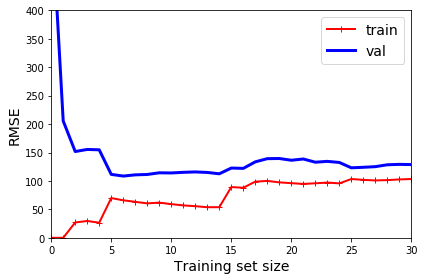

In [440]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 30, 0, 400])                            # not shown in the book
save_fig("underfitting_learning_curves_plot")         # not shown
plt.show()                                            # not shown

Saving figure learning_curves_plot


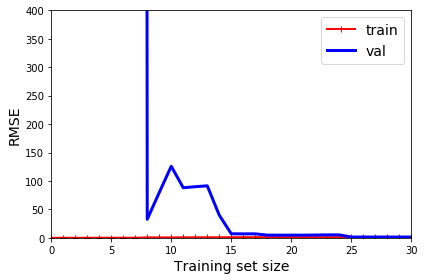

In [441]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 30, 0, 400])            
save_fig("learning_curves_plot")    
plt.savefig("underfitting_learning_curves_plot")
plt.show()                           